<a href="https://colab.research.google.com/github/adithyanperingode/MI-IPL-Match-Result-Prediction/blob/main/Support_Vector_Machines_V0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [19]:
# Load the dataset from Github
Data = pd.read_csv('https://raw.githubusercontent.com/adithyanperingode/MI-IPL-Match-Result-Prediction/main/MI%20IPL%20Data_Post%20EDA.csv')
Data.head()

,Sr No,Time,MI_Match No,Opposite Team,Match_City,Match_Month,Match_Date,Match Type,Toss,Batting Sequence,...,No of Blowers,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,Umpire_Nitin Menon,Umpire_Kumar Dharmasena,Umpire_Chris Gaffaney,Umpire_Others,Result
0,1.0,D/N,2.0,Others,Mumbai,May,Odd,Home,Won,2.0,...,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,Win
1,2.0,N,3.0,SRH,Mumbai,May,Even,Home,Lost,2.0,...,3.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,Win
2,3.0,N,4.0,Others,Mumbai,May,Odd,Home,Won,2.0,...,4.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,Win
3,4.0,N,5.0,Others,Mumbai,Apr,Even,Home,Lost,1.0,...,4.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,Win
4,5.0,N,6.0,RCB,Mumbai,Apr,Even,Home,Won,2.0,...,3.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,Lost


In [20]:
# Extracting the Columns with Categorical Values
categorical_cols = [col for col in Data.columns if Data[col].dtype == 'object']
print(categorical_cols)

['Time ', 'Opposite Team', 'Match_City', 'Match_Month', 'Match_Date', 'Match Type', 'Toss', 'Match_Stadium', 'Captain', 'Head Coach', 'Result']


In [21]:
# Basic information about the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sr No                    246 non-null    float64
 1   Time                     236 non-null    object 
 2   MI_Match No              246 non-null    float64
 3   Opposite Team            247 non-null    object 
 4   Match_City               246 non-null    object 
 5   Match_Month              246 non-null    object 
 6   Match_Date               246 non-null    object 
 7   Match Type               246 non-null    object 
 8   Toss                     246 non-null    object 
 9   Batting Sequence         245 non-null    float64
 10  Match Score              245 non-null    float64
 11  Match_Stadium            246 non-null    object 
 12  Captain                  246 non-null    object 
 13  Head Coach               247 non-null    object 
 14  No of Blowers            2

In [22]:
# Calaculate null values % in each columns
null_values_percent = (Data.isnull().sum() / Data.shape[0]) * 100
for col, percent in zip(Data.columns, null_values_percent):
    print(f"Column '{col}' has {percent:.2f}% null values.")

Column 'Sr No' has 0.40% null values.
Column 'Time ' has 4.45% null values.
Column 'MI_Match No' has 0.40% null values.
Column 'Opposite Team' has 0.00% null values.
Column 'Match_City' has 0.40% null values.
Column 'Match_Month' has 0.40% null values.
Column 'Match_Date' has 0.40% null values.
Column 'Match Type' has 0.40% null values.
Column 'Toss' has 0.40% null values.
Column 'Batting Sequence' has 0.81% null values.
Column 'Match Score' has 0.81% null values.
Column 'Match_Stadium' has 0.40% null values.
Column 'Captain' has 0.40% null values.
Column 'Head Coach' has 0.00% null values.
Column 'No of Blowers' has 0.40% null values.
Column 'No of All Rounders' has 0.40% null values.
Column 'No of Batsman' has 0.40% null values.
Column 'Umpire_Sundaram Ravi' has 0.40% null values.
Column 'Umpire_Anil Chaudhary' has 0.40% null values.
Column 'Umpire_Nitin Menon' has 0.40% null values.
Column 'Umpire_Kumar Dharmasena' has 0.40% null values.
Column 'Umpire_Chris Gaffaney' has 0.40% null

In [23]:
# Replace the null value in ''Time' with Mode
Data['Time '].fillna(Data['Time '].mode()[0], inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sr No                    246 non-null    float64
 1   Time                     247 non-null    object 
 2   MI_Match No              246 non-null    float64
 3   Opposite Team            247 non-null    object 
 4   Match_City               246 non-null    object 
 5   Match_Month              246 non-null    object 
 6   Match_Date               246 non-null    object 
 7   Match Type               246 non-null    object 
 8   Toss                     246 non-null    object 
 9   Batting Sequence         245 non-null    float64
 10  Match Score              245 non-null    float64
 11  Match_Stadium            246 non-null    object 
 12  Captain                  246 non-null    object 
 13  Head Coach               247 non-null    object 
 14  No of Blowers            2

In [24]:
# Adding One Hot Encoding to 'Time ','Opposite Team', 'Match_City', 'Match_Month', 'Match_Date', 'Match Type', 'Toss', 'Match_Stadium', 'Captain', 'Head Coach', 'Result'
Data = pd.get_dummies(Data, columns=['Time ', 'Opposite Team','Match_City', 'Match_Month', 'Match_Date', 'Match Type', 'Toss', 'Match_Stadium', 'Captain', 'Head Coach', 'Result'], dtype=int)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 62 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Sr No                                                   246 non-null    float64
 1   MI_Match No                                             246 non-null    float64
 2   Batting Sequence                                        245 non-null    float64
 3   Match Score                                             245 non-null    float64
 4   No of Blowers                                           246 non-null    float64
 5   No of All Rounders                                      246 non-null    float64
 6   No of Batsman                                           246 non-null    float64
 7   Umpire_Sundaram Ravi                                    246 non-null    float64
 8   Umpire_Anil Chaudhary                   

In [25]:
# Drop null value row from 'Batting Sequence'
Data.dropna(subset=['Batting Sequence'], inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 245
Data columns (total 62 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Sr No                                                   245 non-null    float64
 1   MI_Match No                                             245 non-null    float64
 2   Batting Sequence                                        245 non-null    float64
 3   Match Score                                             245 non-null    float64
 4   No of Blowers                                           245 non-null    float64
 5   No of All Rounders                                      245 non-null    float64
 6   No of Batsman                                           245 non-null    float64
 7   Umpire_Sundaram Ravi                                    245 non-null    float64
 8   Umpire_Anil Chaudhary                        

In [26]:
# Drop 'Sr No', 'Umpire_Others',  'Time _D/N','Opposite Team_Others',Match_Date_Odd,Match Type_Away,Toss_Lost,Match_Stadium_Others,Captain_Others,Result_Lost
Data = Data.drop(['Sr No', 'Umpire_Others',  'Time _D/N','Opposite Team_Others','Match_Date_Odd','Match Type_Away','Toss_Lost','Match_Stadium_Others','Captain_Others','Result_Lost'], axis=1)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 245
Data columns (total 52 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MI_Match No                                             245 non-null    float64
 1   Batting Sequence                                        245 non-null    float64
 2   Match Score                                             245 non-null    float64
 3   No of Blowers                                           245 non-null    float64
 4   No of All Rounders                                      245 non-null    float64
 5   No of Batsman                                           245 non-null    float64
 6   Umpire_Sundaram Ravi                                    245 non-null    float64
 7   Umpire_Anil Chaudhary                                   245 non-null    float64
 8   Umpire_Nitin Menon                           

In [27]:
# Drop 'Match_City_Bengaluru','Match_City_Chennai','Match_City_Delhi','Match_City_Kolkata','Match_City_Mumbai','Match_City_Others','Match_Month_Apr','Match_Month_Mar','Match_Month_May','Match_Month_Nov','Match_Month_Oct','Match_Month_Sep','Match_Date_Even'
Data = Data.drop(['Match_City_Bengaluru','Match_City_Chennai','Match_City_Delhi','Match_City_Kolkata','Match_City_Mumbai','Match_City_Others','Match_Month_Apr','Match_Month_Mar','Match_Month_May','Match_Month_Nov','Match_Month_Oct','Match_Month_Sep','Match_Date_Even'], axis=1)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 245
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MI_Match No                                             245 non-null    float64
 1   Batting Sequence                                        245 non-null    float64
 2   Match Score                                             245 non-null    float64
 3   No of Blowers                                           245 non-null    float64
 4   No of All Rounders                                      245 non-null    float64
 5   No of Batsman                                           245 non-null    float64
 6   Umpire_Sundaram Ravi                                    245 non-null    float64
 7   Umpire_Anil Chaudhary                                   245 non-null    float64
 8   Umpire_Nitin Menon                           

In [28]:
# Normalize the data except for the 'Result_Win' column
numeric_cols = [col for col in Data.columns if Data[col].dtype in ['int64', 'float64'] and col != 'Result_Win']
for col in numeric_cols:
  Data[col] = (Data[col] - Data[col].min()) / (Data[col].max() - Data[col].min())
Data.head()

,MI_Match No,Batting Sequence,Match Score,No of Blowers,No of All Rounders,No of Batsman,Umpire_Sundaram Ravi,Umpire_Anil Chaudhary,Umpire_Nitin Menon,Umpire_Kumar Dharmasena,...,Captain_Rohit Sharma,Captain_Sachin Tendulkar,Head Coach_John Wright,Head Coach_Lalchand Rajput,Head Coach_Mahela Jayawardene,Head Coach_Mark Boucher,Head Coach_Ricky Ponting,Head Coach_Robin Singh,Head Coach_Shaun Pollock,Result_Win
0,0.055556,1.0,0.666667,0.6,0.333333,0.4,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,0.111111,1.0,1.000000,0.4,0.333333,0.6,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.166667,1.0,0.666667,0.6,0.333333,0.4,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,0.222222,0.0,1.000000,0.6,0.500000,0.2,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.277778,1.0,1.000000,0.4,0.500000,0.4,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


<Axes: >

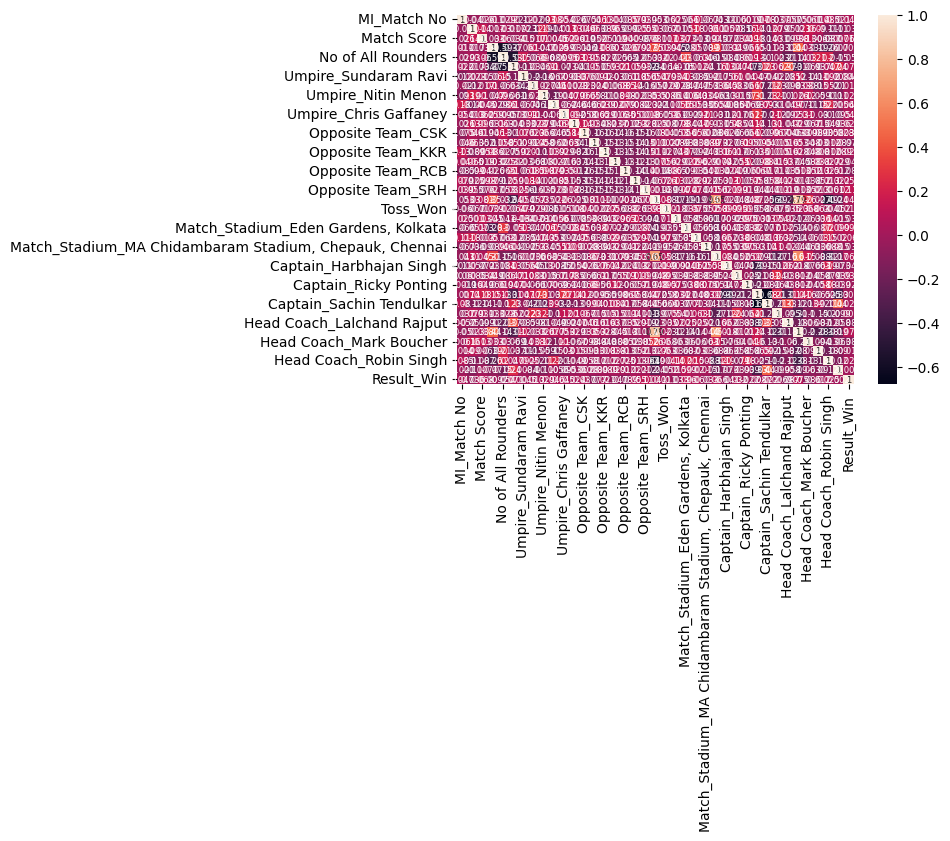

In [29]:
corr_matrix = Data.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize":6})

In [13]:
X =Data.loc[:, Data.columns != 'Result_Win']
y = Data['Result_Win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
m3 = SVC(kernel = 'rbf', random_state = 0)
m3.fit(X_train, y_train)

SVC(random_state=0)

In [31]:
pred_svm = m3.predict(X_test)
pred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.67      0.05      0.10        39
           1       0.48      0.97      0.64        35

    accuracy                           0.49        74
   macro avg       0.57      0.51      0.37        74
weighted avg       0.58      0.49      0.35        74



In [33]:
accuracy = metrics.accuracy_score(y_test, pred_knn)
Precision = metrics.precision_score(y_test, pred_knn)
Recall = metrics.recall_score(y_test, pred_knn)
print("Accuracy :",accuracy)
print("Precision:",Precision)
print("Recall   :",Recall)

Accuracy : 0.5135135135135135
Precision: 0.4897959183673469
Recall   : 0.6857142857142857
